In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import regex as re
import statistics


In [2]:
df=pd.read_csv('map_data.csv')
df.head()

,name,address,type_of_place,rating,reviews,contact,url
0,Akhil India private limited 91-C warehouse jammu,"Ratnuchak, Sanjay Nagar, Gujarbasti, Jammu, Ja...",warehouses in india,4.7,(3),NaN,https://www.google.com/maps/place/Akhil+India+...
1,Safari Industries India Ltd,"Camp Gurdwara, H No. 288, Ward No. 58, near Di...",warehouses in india,4.3,(6),NaN,https://www.google.com/maps/place/Safari+Indus...
2,VI Warehouse Jammu,"White House, Vodafone Idea Warehouse Anke Indu...",warehouses in india,4.5,(2),NaN,https://www.google.com/maps/place/VI+Warehouse...
3,FastBeetle Warehouse Jammu,"Dharap, Jammu, Jammu and Kashmir 181132",warehouses in india,3.6,(5),NaN,https://www.google.com/maps/place/FastBeetle+W...
4,Rani Bagh Warehouse,"MRHR+RCF, RS Pura Rd, Raipur Satwari, Jammu, J...",warehouses in india,4.5,(4),094191 44732,https://www.google.com/maps/place/Rani+Bagh+Wa...


### EXTRACTING LATITUDE AND LONGITUDE FROM URL

In [3]:
def lat_lon(url):
    match = re.search(r'@(-?\d+\.\d+),(-?\d+\.\d+)', url)
    if match:
        latitude = float(match.group(1))
        longitude = float(match.group(2))
        return latitude, longitude
    else:
        return None, None

df['latitude'], df['longitude'] = zip(*df['url'].apply(lat_lon))

df.head()


,name,address,type_of_place,rating,reviews,contact,url,latitude,longitude
0,Akhil India private limited 91-C warehouse jammu,"Ratnuchak, Sanjay Nagar, Gujarbasti, Jammu, Ja...",warehouses in india,4.7,(3),NaN,https://www.google.com/maps/place/Akhil+India+...,32.715812,74.552817
1,Safari Industries India Ltd,"Camp Gurdwara, H No. 288, Ward No. 58, near Di...",warehouses in india,4.3,(6),NaN,https://www.google.com/maps/place/Safari+Indus...,32.715812,74.552817
2,VI Warehouse Jammu,"White House, Vodafone Idea Warehouse Anke Indu...",warehouses in india,4.5,(2),NaN,https://www.google.com/maps/place/VI+Warehouse...,32.715812,74.552817
3,FastBeetle Warehouse Jammu,"Dharap, Jammu, Jammu and Kashmir 181132",warehouses in india,3.6,(5),NaN,https://www.google.com/maps/place/FastBeetle+W...,32.715812,74.552817
4,Rani Bagh Warehouse,"MRHR+RCF, RS Pura Rd, Raipur Satwari, Jammu, J...",warehouses in india,4.5,(4),094191 44732,https://www.google.com/maps/place/Rani+Bagh+Wa...,32.715812,74.552817


### DATA CLEANING & DATA PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           218 non-null    object 
 1   address        218 non-null    object 
 2   type_of_place  218 non-null    object 
 3   rating         213 non-null    float64
 4   reviews        213 non-null    object 
 5   contact        152 non-null    object 
 6   url            218 non-null    object 
 7   latitude       218 non-null    float64
 8   longitude      218 non-null    float64
dtypes: float64(3), object(6)
memory usage: 15.5+ KB


In [5]:
df.isna().sum()

name              0
address           0
type_of_place     0
rating            5
reviews           5
contact          66
url               0
latitude          0
longitude         0
dtype: int64

In [6]:
#Filling null values:
df['rating']=df['rating'].fillna(2.5)
df['reviews']=df['reviews'].fillna("(0)")

In [7]:
#Fixing reviews i.e. (3)->3
def revi(obj):
    return obj[1:-1]

In [8]:
df['reviews']=df['reviews'].apply(revi)
df.head()

,name,address,type_of_place,rating,reviews,contact,url,latitude,longitude
0,Akhil India private limited 91-C warehouse jammu,"Ratnuchak, Sanjay Nagar, Gujarbasti, Jammu, Ja...",warehouses in india,4.7,3,NaN,https://www.google.com/maps/place/Akhil+India+...,32.715812,74.552817
1,Safari Industries India Ltd,"Camp Gurdwara, H No. 288, Ward No. 58, near Di...",warehouses in india,4.3,6,NaN,https://www.google.com/maps/place/Safari+Indus...,32.715812,74.552817
2,VI Warehouse Jammu,"White House, Vodafone Idea Warehouse Anke Indu...",warehouses in india,4.5,2,NaN,https://www.google.com/maps/place/VI+Warehouse...,32.715812,74.552817
3,FastBeetle Warehouse Jammu,"Dharap, Jammu, Jammu and Kashmir 181132",warehouses in india,3.6,5,NaN,https://www.google.com/maps/place/FastBeetle+W...,32.715812,74.552817
4,Rani Bagh Warehouse,"MRHR+RCF, RS Pura Rd, Raipur Satwari, Jammu, J...",warehouses in india,4.5,4,094191 44732,https://www.google.com/maps/place/Rani+Bagh+Wa...,32.715812,74.552817


In [9]:
#converting reviews object data type to float64
df['reviews'] = df['reviews'].str.replace(',', '').astype(float)

In [10]:
#removing contact column as it has a lot of variablities in format and a lot of null values
df.drop(['contact'],axis=1,inplace=True)

In [11]:
#modifying type of place column
def top(obj):
    return obj.split()[0]


In [12]:
df['type_of_place']=df['type_of_place'].apply(top)

In [13]:
df.head()

,name,address,type_of_place,rating,reviews,url,latitude,longitude
0,Akhil India private limited 91-C warehouse jammu,"Ratnuchak, Sanjay Nagar, Gujarbasti, Jammu, Ja...",warehouses,4.7,3.0,https://www.google.com/maps/place/Akhil+India+...,32.715812,74.552817
1,Safari Industries India Ltd,"Camp Gurdwara, H No. 288, Ward No. 58, near Di...",warehouses,4.3,6.0,https://www.google.com/maps/place/Safari+Indus...,32.715812,74.552817
2,VI Warehouse Jammu,"White House, Vodafone Idea Warehouse Anke Indu...",warehouses,4.5,2.0,https://www.google.com/maps/place/VI+Warehouse...,32.715812,74.552817
3,FastBeetle Warehouse Jammu,"Dharap, Jammu, Jammu and Kashmir 181132",warehouses,3.6,5.0,https://www.google.com/maps/place/FastBeetle+W...,32.715812,74.552817
4,Rani Bagh Warehouse,"MRHR+RCF, RS Pura Rd, Raipur Satwari, Jammu, J...",warehouses,4.5,4.0,https://www.google.com/maps/place/Rani+Bagh+Wa...,32.715812,74.552817


In [14]:
df['type_of_place']=df['type_of_place'].replace('Hostpitals','hospitals')

### DATA ANALYTICS AND VISUALIZATIONS

In [15]:
#average ratings of places
lw=[]
lm=[]
lh=[]
lp=[]
ls=[]
lu=[]
for i in df.values:
    if(i[2]=='warehouses'):
        lw.append(i[3])
    elif(i[2]=='malls'):
        lm.append(i[3])
    elif(i[2]=='hospitals'):
        lh.append(i[3])
    elif(i[2]=='parking-lots'):
        lp.append(i[3])
    elif(i[2]=='schools'):
        ls.append(i[3])
    elif(i[2]=='Universities'):
        lu.append(i[3])
        


In [16]:
print('-'*55)
print('Average rating for warehouses is: ',statistics.mean(lw))
print('Average rating for malls is: ',statistics.mean(lm))
print('Average rating for hospitals is: ',statistics.mean(lh))
print('Average rating for parking-lots is: ',statistics.mean(lp))
print('Average rating for schools is: ',statistics.mean(ls))
print('Average rating for universities is: ',statistics.mean(lu))
print('-'*55)


-------------------------------------------------------
Average rating for warehouses is:  4.015151515151515
Average rating for malls is:  4.16578947368421
Average rating for hospitals is:  4.192857142857143
Average rating for parking-lots is:  3.952
Average rating for schools is:  4.223076923076923
Average rating for universities is:  4.278048780487805
-------------------------------------------------------


<Axes: xlabel='name'>

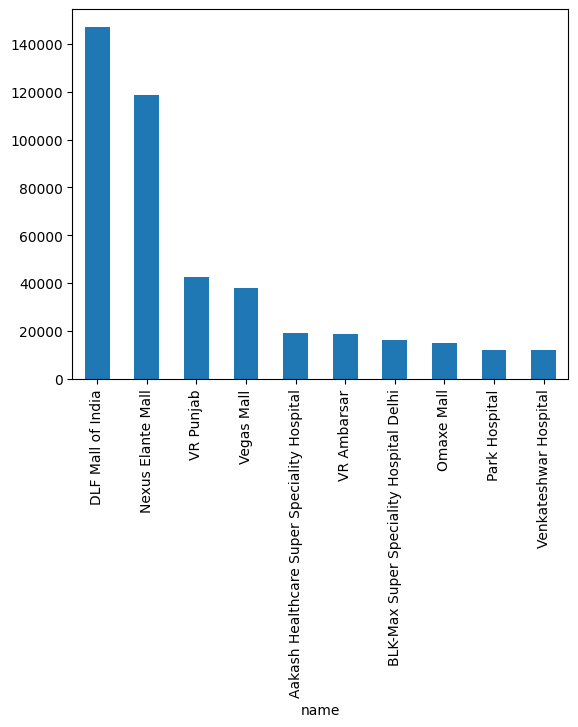

In [17]:
#places with most number of reviews:
df.groupby('name').max()['reviews'].nlargest(10).plot(kind='bar')

In [18]:
df.groupby(['name','type_of_place']).max()['reviews'].nlargest(10)

name                                         type_of_place
DLF Mall of India                            malls            147255.0
Nexus Elante Mall                            malls            118809.0
VR Punjab                                    malls             42750.0
Vegas Mall                                   malls             37797.0
Aakash Healthcare Super Speciality Hospital  hospitals         19065.0
VR Ambarsar                                  malls             18793.0
BLK-Max Super Speciality Hospital Delhi      hospitals         16407.0
Omaxe Mall                                   malls             14898.0
Park Hospital                                hospitals         12126.0
Venkateshwar Hospital                        hospitals         12124.0
Name: reviews, dtype: float64

Malls Are the most visited place among other places

In [19]:
#places with highest ratings
df.groupby(['name','type_of_place']).max()['rating'].nlargest(10)

name                                                             type_of_place
Benevolence logistics                                            warehouses       5.0
Best Cancer Hospital in India                                    hospitals        5.0
Best Spine Surgery Hospital in India                             hospitals        5.0
Central warehousing corporation                                  warehouses       5.0
CollegeSakha - Top Colleges, Universities & Institutes in india  Universities     5.0
La Trobe International India                                     Universities     5.0
My Care India | Medical Tourism | Health Tourism in India        hospitals        5.0
Pearl omax parking lot                                           parking-lots     5.0
RED Ambulances - RED.Health Gurgaon                              hospitals        5.0
ServeXplus India Central Warehouse                               warehouses       5.0
Name: rating, dtype: float64

hospitals       42
Universities    41
schools         39
malls           38
warehouses      33
parking-lots    25
Name: type_of_place, dtype: int64


<Axes: >

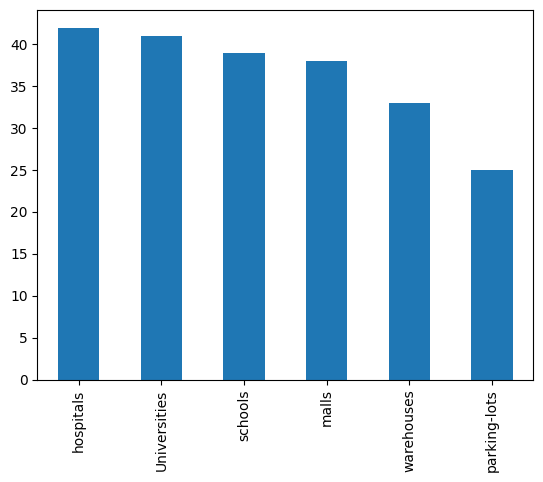

In [20]:
print(df['type_of_place'].value_counts())
df['type_of_place'].value_counts().plot(kind='bar')

### PLOTTING MAP FOR EACH LOCATION

In [27]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="name", color="type_of_place",
                        zoom=5, height=600,width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [28]:
df.to_csv('map_data_cleaned.csv',index=False)